In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data_practice.csv')
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0
3,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,...,0,0,0,1,0,0,0,0,0,0
4,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,...,0,0,0,0,0,0,0,0,0,0
4996,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,...,0,0,0,0,0,0,0,0,0,0
4997,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,...,0,0,0,0,0,0,0,0,0,0
4998,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,...,0,0,0,0,0,0,0,0,0,0


## 1.1. Анализ важности признаков и сокращение размерности
- Провести сокращение размерности исходного датасета, сохранив 95% дисперсии
- Выполнить анализ важности признаков с использованием методов неконтролируемого обучения
- Визуализировать результаты с помощью графиков
- Подробно описать полученные результаты

In [3]:
!pip install pubchempy
import pubchempy as pcp

In [4]:
X = df.drop(['smiles','gap'],axis=1)
Y = df['gap']

X_norm = MinMaxScaler().fit_transform(X)

In [5]:
#Import required libraries
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_norm)

#Print results
print('Original Dimensions: ',X_norm.shape)
print('Reduced Dimensions: ',X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (5000, 228)
Reduced Dimensions:  (5000, 55)
Explained variance:  0.9517706976685405


In [7]:
df_pc = pd.DataFrame(data = X_reduced, columns = [f'PC{i}' for i in range(1,56)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']],pd.DataFrame(X_norm, columns=X.columns)], axis=1)
df_col

,PC1,PC2,PC3,A,B,C,mu,alpha,homo,lumo,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.021708,-0.087914,-0.833331,0.250894,0.333794,0.362429,0.251268,0.339991,0.409007,0.537879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.181786,0.437851,0.831687,0.097490,0.069634,0.057731,0.186363,0.656190,0.376838,0.297559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.258993,0.235216,-0.164245,0.113824,0.152228,0.154187,0.070676,0.647525,0.578585,0.639731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.670181,0.146165,1.159853,0.096243,0.086310,0.069800,0.172249,0.687913,0.495864,0.490320,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.711138,0.199924,-0.076798,0.127027,0.157788,0.127321,0.104674,0.663093,0.539522,0.597643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.005566,0.034531,0.434494,0.118011,0.103648,0.099254,0.307196,0.662506,0.390625,0.430976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,1.316955,0.245969,-0.480454,0.176792,0.152251,0.182359,0.066152,0.667939,0.633272,0.893939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.926249,0.211653,0.115721,0.100461,0.189064,0.208909,0.111731,0.723895,0.637408,0.872475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,-1.774866,-0.432224,-0.656215,0.337204,0.155977,0.168168,0.227373,0.373329,0.559283,0.509680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


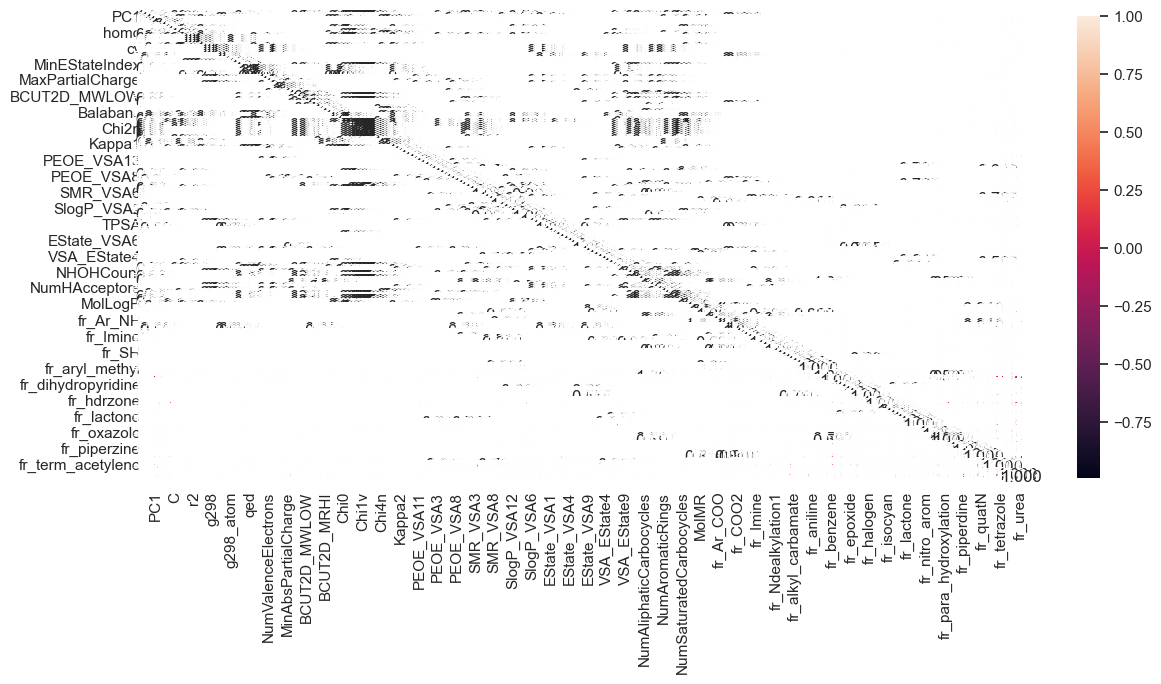

<Figure size 2800x1800 with 0 Axes>

In [8]:
#Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

#Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

In [9]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Select descriptors obtained from PubChem
features = X.columns.tolist()

#Calculate loading scores
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#Plot results
fig = px.scatter(df_pc, x='PC1', y='PC2')
for i, feature in enumerate(features):
    i += -1
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*100,
        y1=loadings[i, 1]*100
    )
    fig.add_annotation(
        x=loadings[i, 0]*120,
        y=loadings[i, 1]*120,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

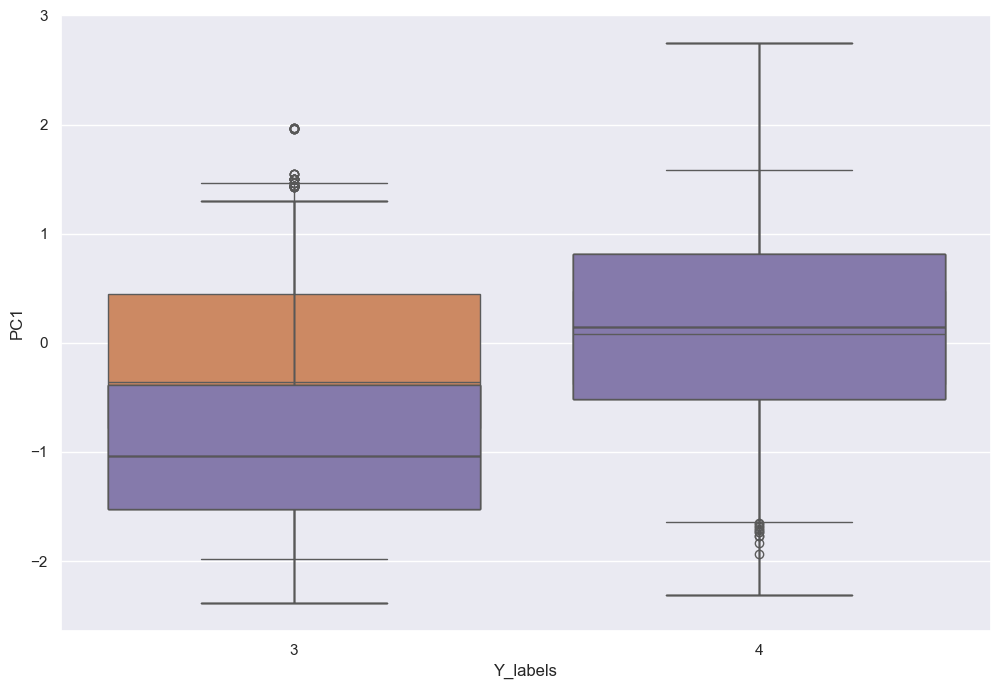

In [16]:
#Create labels for Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 6)
Y_labels = np.digitize(Y, bins)

#Plot the distribution of target per component
target_PCA=pd.DataFrame(zip(X_reduced[:,0],X_reduced[:,1],Y_labels),columns=["PC1","PC2","Y_labels"])

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='Y_labels', y='PC1', data=target_PCA)
plt.show()

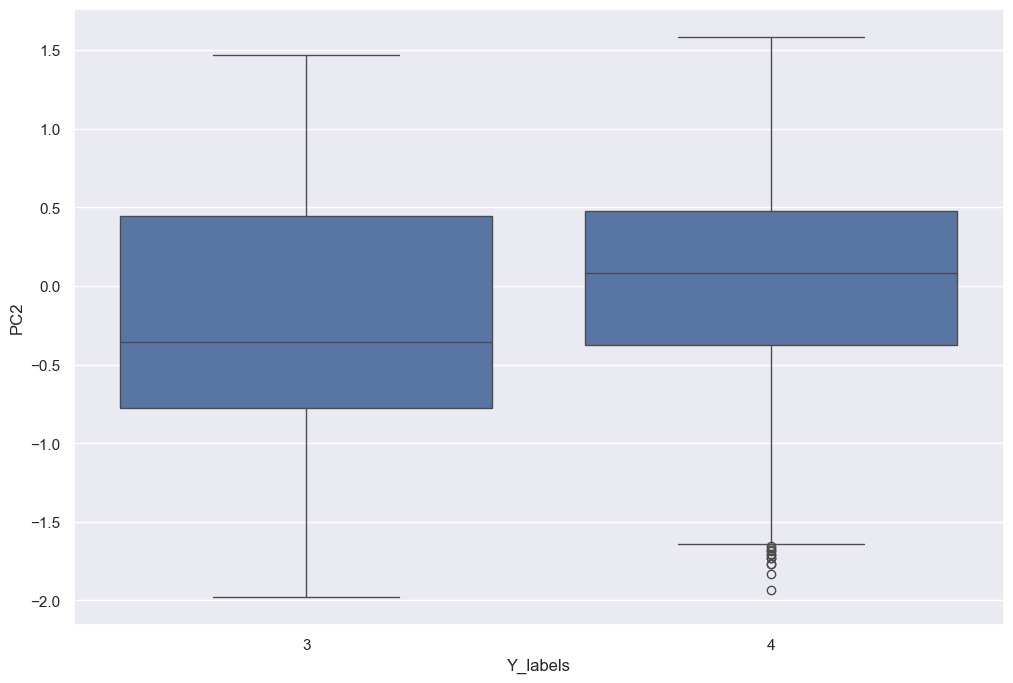

In [17]:
#Plot graphs
sns.boxplot(x='Y_labels', y='PC2', data=target_PCA)
plt.show()


- Подробно описать полученные результаты:...

## 1.2. Нелинейное снижение размерности и кластеризация
- Применить нелинейный метод снижения размерности к исходным данным
- Выполнить кластеризацию данных, используя минимум 2 различных метода
- Определить оптимальные гиперпараметры сжатия и алгоритмов кластеризации с помощью метрики silhouette_score
- Проанализировать выявленные кластеры
- Описать и интерпретировать результаты

T-distributed Stochastic Neighbor Embedding (t-SNE) - это инструмент для визуализации многомерных данных. Он преобразует сходства между точками данных в совместные вероятности и пытается свести к минимуму расхождение Кульбака-Лейблера между совместными вероятностями низкоразмерного внедрения и высокоразмерных данных. t-SNE имеет функцию стоимости, которая не является выпуклой, т.е. при разных инициализациях мы можем получить разные результаты.

В scikit-learn поддерживается только преобразование с функцией подгонки одновременно.

In [18]:
#Import required libraries
from sklearn.manifold import TSNE

In [206]:
#Perform t-SNE
tsne = TSNE(n_components=2, perplexity=155)
X_tsne = tsne.fit_transform(X_norm)

отображается цветовая карта для отображения значений y = gap

 создается цветовая шкала (colorbar), которая отображает соответствие между значениями Y и цветами на графике. "E" используется как метка для цветовой шкалы.

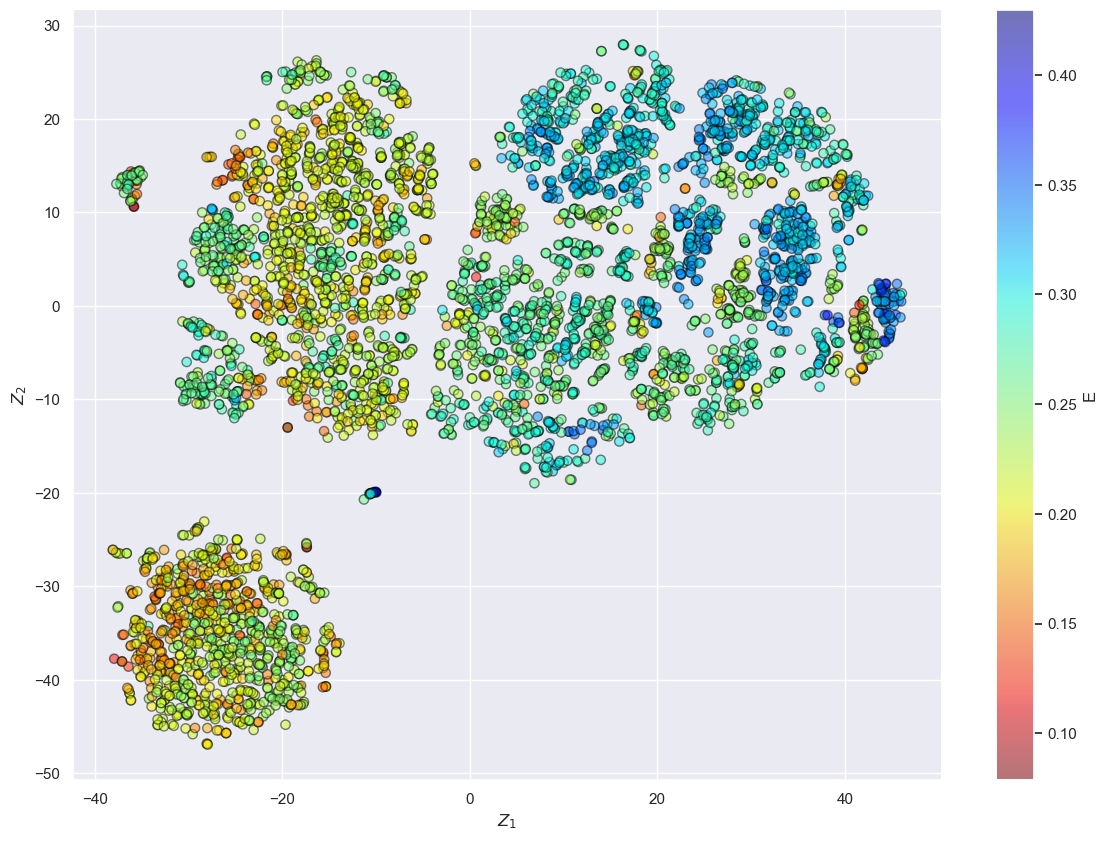

In [163]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

In [164]:
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

New Shape of X:  (5000, 2)
Kullback-Leibler divergence after optimization:  1.0939819812774658
No. of iterations:  999


### проведем кластеризацию данных двумя методами


k-means

In [165]:
!pip install kneed

In [166]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

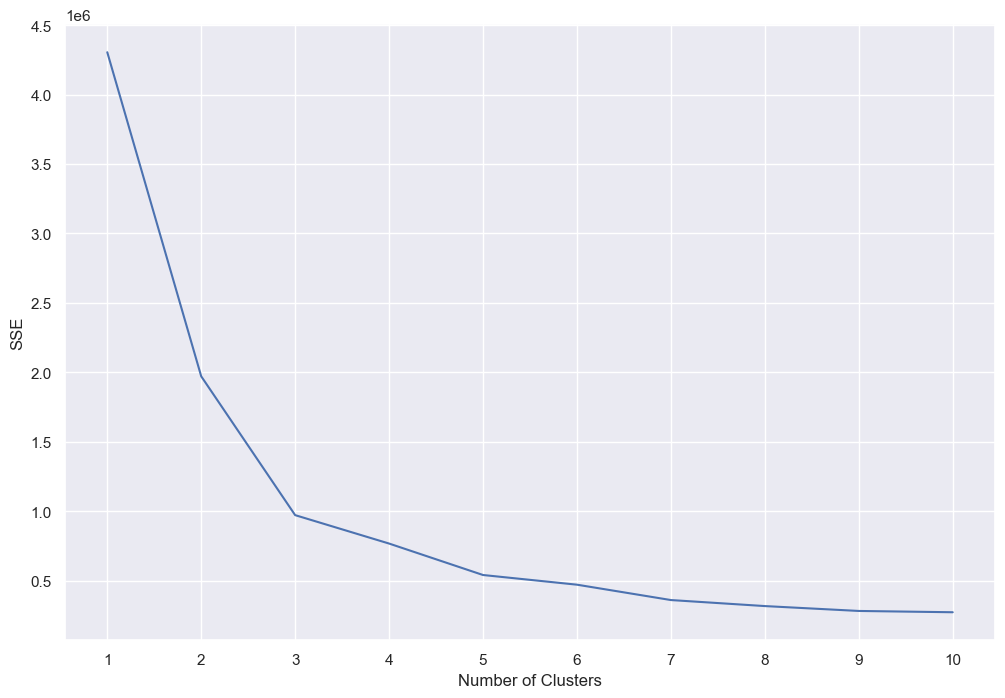

In [167]:
# K calculation method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tsne)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [168]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

np.int64(3)

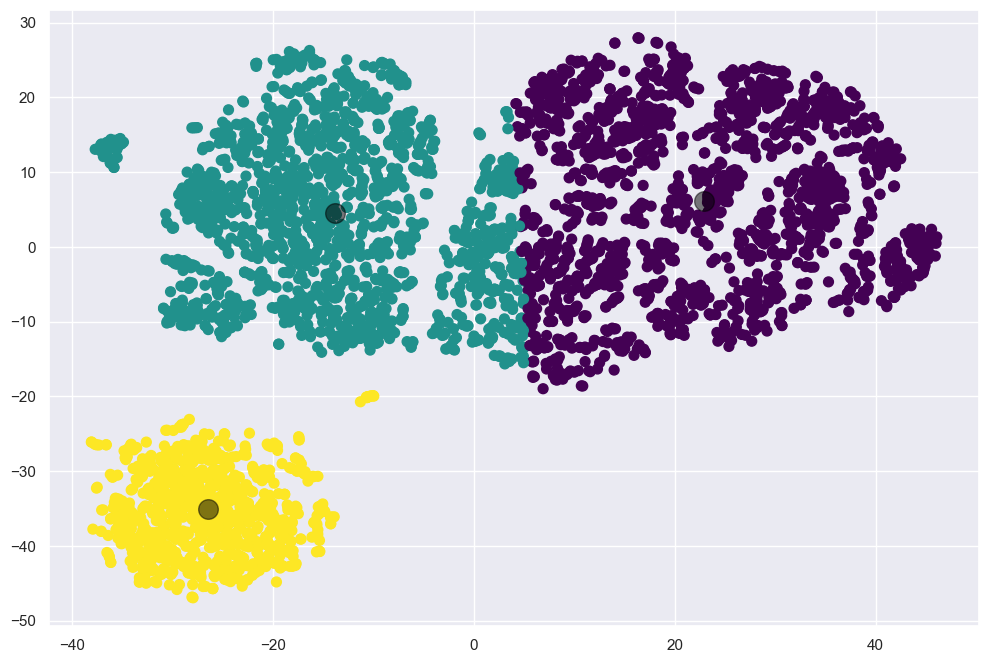

In [169]:
n_clusters=kl.elbow  #The number of clusters to form as well as the number of centroids to generate
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_tsne)
y_aniso = kmeans.predict(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_aniso, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

birch

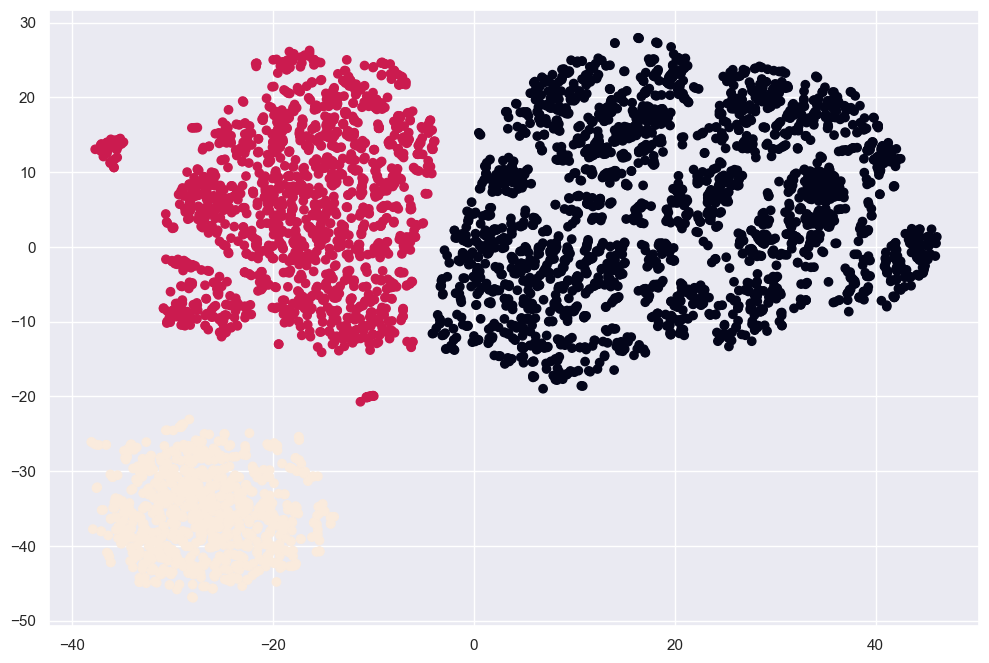

In [170]:
model = Birch()
model.fit(X_tsne)
pred = model.predict(X_tsne) # pred = y2 
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = pred)
plt.show()

Определить оптимальные гиперпараметры сжатия и алгоритмов кластеризации с помощью метрики silhouette_score

In [171]:
from sklearn.metrics import silhouette_score

In [172]:
from sklearn import metrics

In [173]:
print('silhouette_score:', metrics.silhouette_score(X_tsne, y_aniso))

silhouette_score: 0.5205185


In [174]:
print('silhouette_score:', metrics.silhouette_score(X_tsne, pred))

silhouette_score: 0.52045184


In [161]:
y_aniso

array([0, 1, 1, ..., 0, 2, 1], shape=(5000,), dtype=int32)

In [147]:
np.unique(y_aniso)

array([0, 1, 2], dtype=int32)

## 1.3. Работа с молекулярными отпечатками (fingerprints)
- Получить fingerprints для соединений из набора данных
- Применить нелинейный метод снижения размерности
- Выполнить кластеризацию данных, используя минимум 2 различных метода
- Определить оптимальные гиперпараметры с помощью метрики silhouette_score
- Сравнить результаты при использовании различных типов кодирования молекул
- Сделать выводы на основе сравнительного анализа

In [177]:
!pip install rdkit

In [179]:
from rdkit.Chem import MolFromSmiles, RDKFingerprint

In [178]:
df['smiles']

0           N#CC12CC1CO2
1          COCC(O)C#CC=O
2       COC1C2CC(=NO)C12
3          CC(CC=O)OCC#C
4        COC(=N)N1CCC1=N
              ...       
4995     C1CC1(CCC#N)C=O
4996     CCN1C2CC3OC2C13
4997     CN1C2CC(O)CC12C
4998    c1cnc([nH]1)OC=O
4999        COC1CCCOC1=O
Name: smiles, Length: 5000, dtype: object

In [180]:
fingerprints = []
for i in df['smiles']:
  mol = MolFromSmiles(i)
  fingerprints_rdk = np.array(RDKFingerprint(mol))
  fingerprints.append(fingerprints_rdk)


In [181]:
df_fnp = pd.DataFrame(fingerprints)
df_fnp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
4997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4998,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [182]:
Y = df['gap']

In [254]:
#Perform t-SNE
tsne_f = TSNE(n_components=2, perplexity=25)
X_tsne_f = tsne_f.fit_transform(df_fnp)

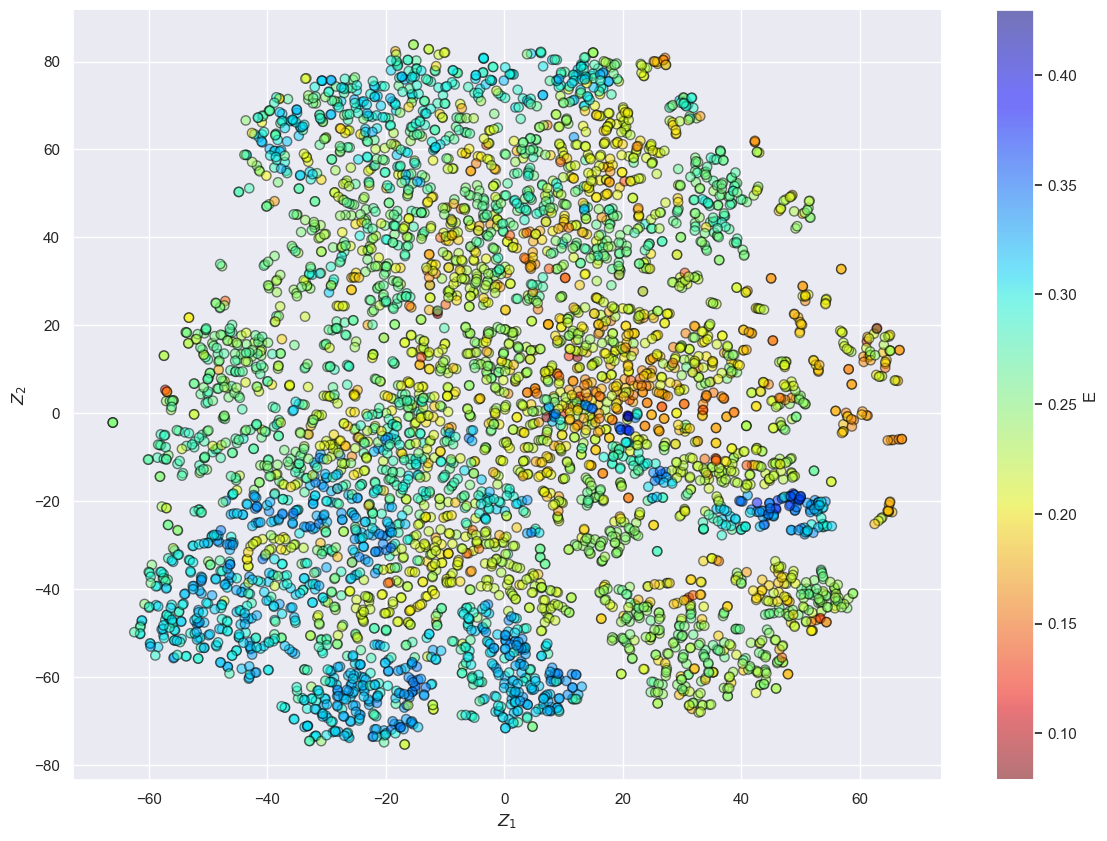

In [255]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne_f[:,0], X_tsne_f[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

In [256]:
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

New Shape of X:  (5000, 2)
Kullback-Leibler divergence after optimization:  1.0946977138519287
No. of iterations:  999


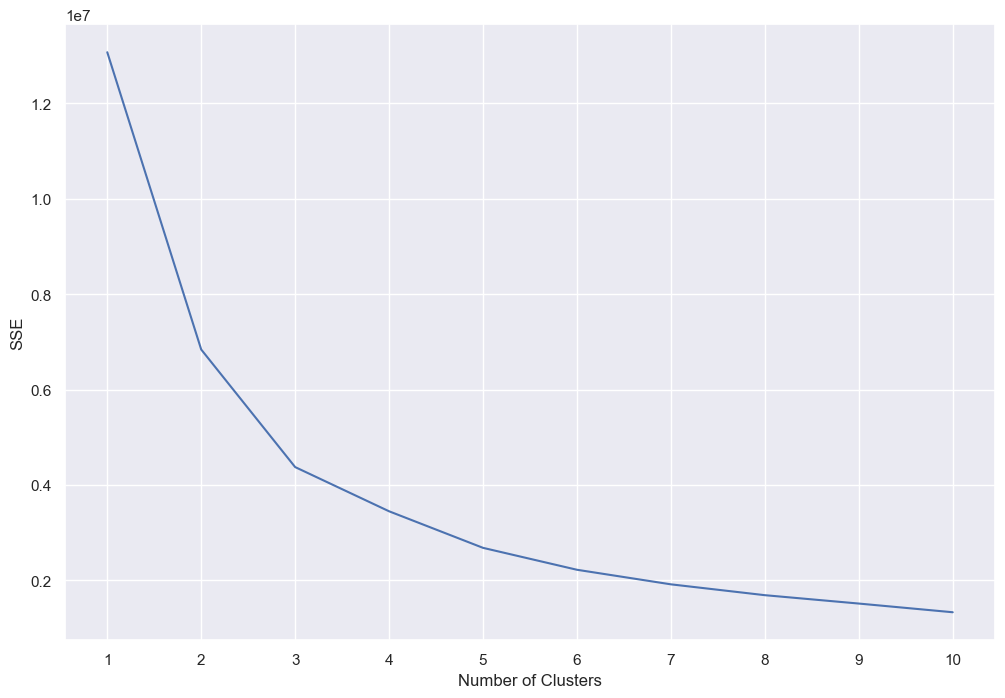

In [257]:
# K calculation method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tsne_f)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [258]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

np.int64(3)

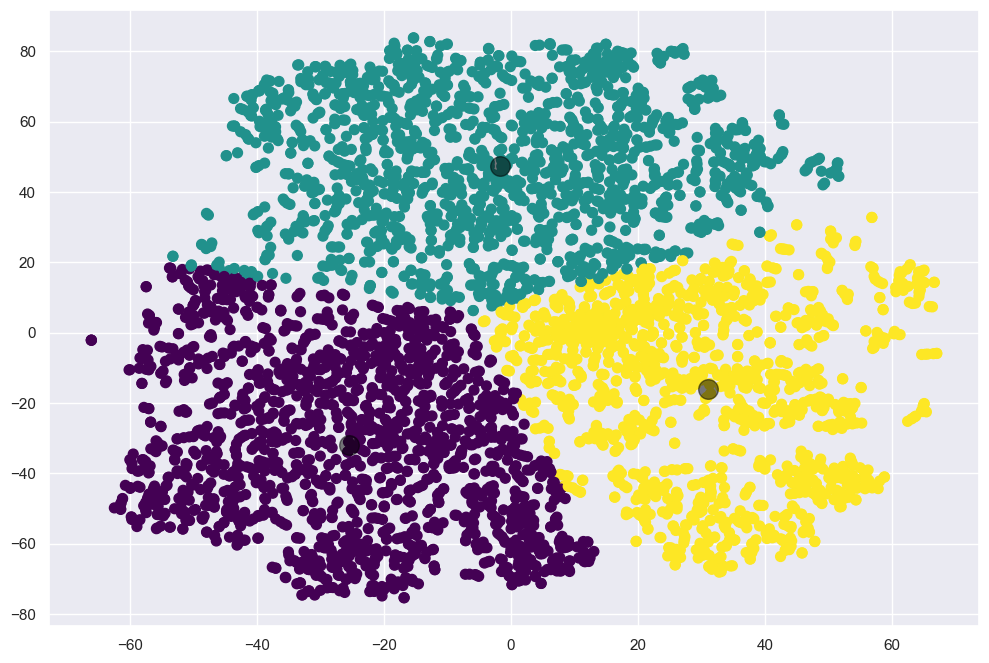

In [259]:
n_clusters=kl.elbow  #The number of clusters to form as well as the number of centroids to generate
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_tsne_f)
y_aniso = kmeans.predict(X_tsne_f)
plt.scatter(X_tsne_f[:, 0], X_tsne_f[:, 1], c=y_aniso, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

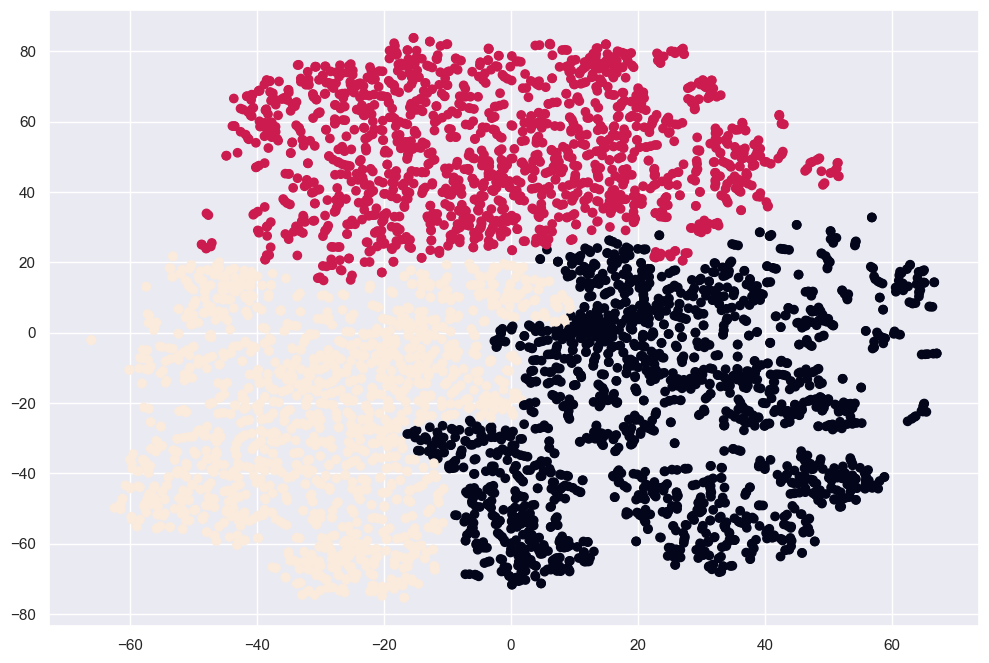

In [260]:
model = Birch()
model.fit(X_tsne_f)
pred = model.predict(X_tsne_f) # pred = y2 
plt.scatter(X_tsne_f[:, 0], X_tsne_f[:, 1], c = pred)
plt.show()

In [261]:
print('silhouette_score:', metrics.silhouette_score(X_tsne_f, pred))

silhouette_score: 0.38158077


In [262]:
print('silhouette_score:', metrics.silhouette_score(X_tsne_f, y_aniso))

silhouette_score: 0.41760665
